In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import nltk
nltk.data.path.append("C:\\Users\\DELL\\AppData\\Roaming\\nltk_data")


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# File Path
file_path = r"C:\Users\DELL\Downloads\archive\Hotel_Reviews.csv"

In [4]:
# Load Data
df = pd.read_csv(file_path)

# Data Cleaning
df["review"] = df["Negative_Review"] + " " + df["Positive_Review"]
df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

# Keep relevant columns
df = df[["review", "is_bad_review"]]

In [7]:
df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was ...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [8]:
# Sample 10% of the data
df = df.sample(frac=0.1, random_state=42)


In [9]:
# List of placeholders to remove
placeholders = ["No Negative", "No Positive"]

# Apply replacements for each placeholder
for placeholder in placeholders:
    df["review"] = df["review"].str.replace(placeholder, "", regex=False)


In [15]:
import nltk
nltk.download('averaged_perceptron_tagger', force=True)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [16]:
import nltk
nltk.download('averaged_perceptron_tagger')  # POS Tagger
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # WordNet Lemmatizer


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer

# Function to clean text without NLTK
def clean_text_no_nltk(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Tokenize the text (split by spaces)
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS and len(word) > 1]

    # Lemmatize using a simple lemmatizer (WordNetLemmatizer from NLTK)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a string
    return " ".join(words)

# Apply the cleaning function
df["review_clean"] = df["review"].apply(clean_text_no_nltk)


In [20]:
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["review"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)


In [21]:
df["nb_chars"] = df["review"].apply(len)
df["nb_words"] = df["review"].apply(lambda x: len(x.split()))


In [22]:
tfidf = TfidfVectorizer(min_df=10)
tfidf_result = tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=["word_" + str(x) for x in tfidf.get_feature_names_out()])
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)


In [28]:
# Highest Positive Sentiment Reviews (with more than 5 words)
highest_positive_reviews = df[df["nb_words"] >= 5].sort_values("pos", ascending=False)[["review", "pos"]].head(10)
print("Highest Positive Sentiment Reviews:")
print(highest_positive_reviews)

# Lowest Negative Sentiment Reviews (with more than 5 words)
lowest_negative_reviews = df[df["nb_words"] >= 5].sort_values("neg", ascending=False)[["review", "neg"]].head(10)
print("Lowest Negative Sentiment Reviews:")
print(lowest_negative_reviews)


Highest Positive Sentiment Reviews:
                                                   review    pos
43101          A perfect location comfortable great value  0.931
151468        Welcoming great Food good Service excellent  0.872
90314      Very friendly welcoming manager Super helpful   0.870
24173        Great staff helpful and friendly Impressive   0.870
442568    Excellent location friendly staff clean comf...  0.866
492829        Great location super careful friendly staff  0.865
53635            Good value great location helpful staff   0.859
391763                   Great stay Amazing view Perfect   0.853
493546    Super bed super room super view calm comfort...  0.852
514855             Great position comfortable great staff  0.852
Lowest Negative Sentiment Reviews:
                                                   review    neg
356368           Nothing   Great helpful wonderful staff   0.812
458794          Nothing  Excellent friendly helpful staff  0.799
291281       nothin

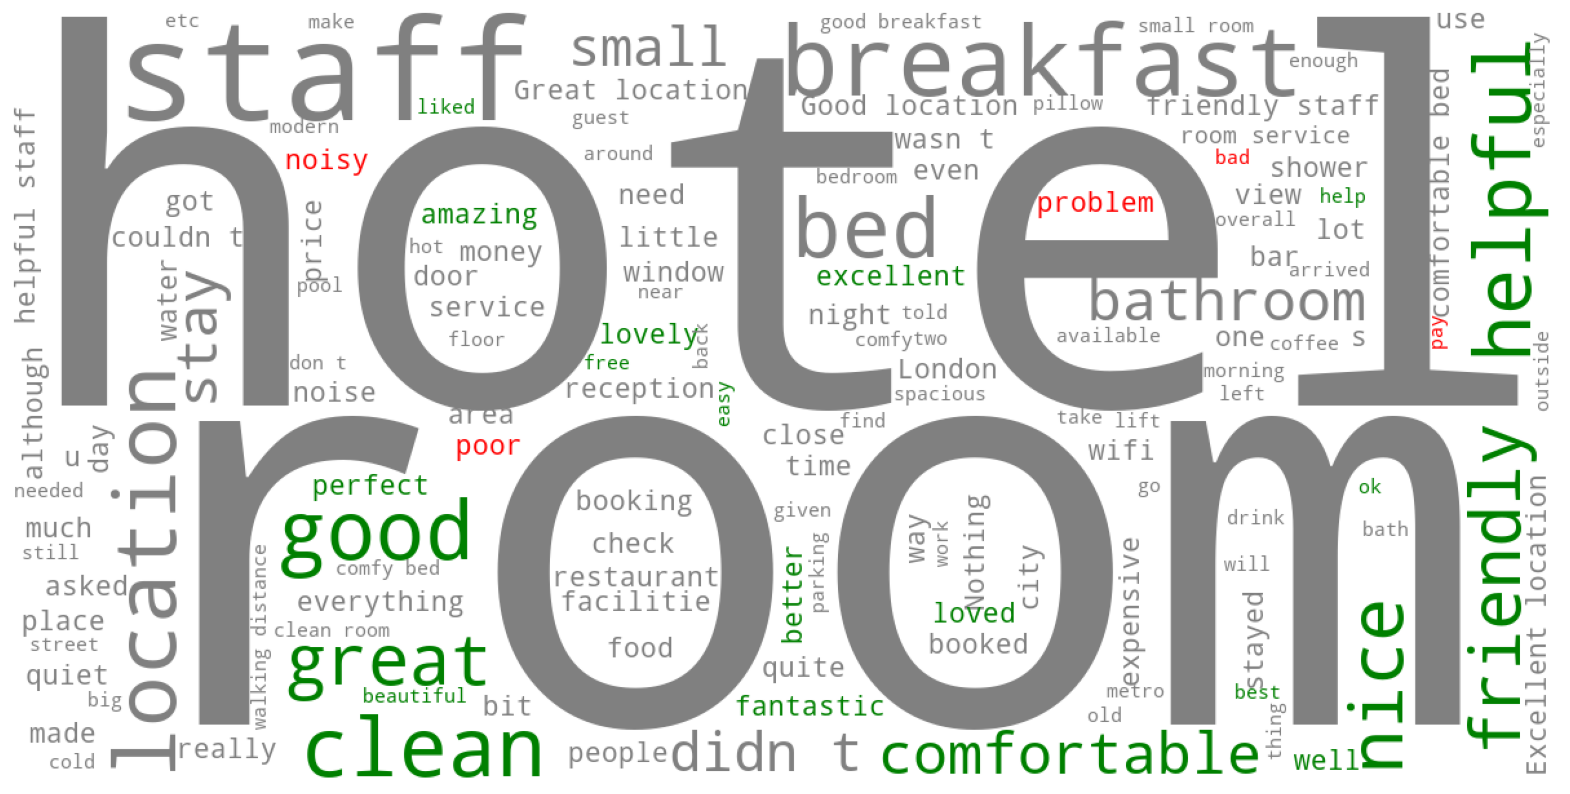

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to get sentiment of a word (positive or negative)
def get_word_sentiment(word, sid):
    sentiment = sid.polarity_scores(word)['compound']
    if sentiment > 0:
        return 'green'  # Positive sentiment
    elif sentiment < 0:
        return 'red'    # Negative sentiment
    else:
        return 'grey'   # Neutral sentiment

# Custom color function for wordcloud
def color_func(word, **kwargs):
    sentiment = kwargs.get('sentiment', 0)
    if sentiment > 0:
        return 'green'  # Positive sentiment
    elif sentiment < 0:
        return 'red'    # Negative sentiment
    else:
        return 'grey'   # Neutral sentiment

# Function to create and show WordCloud
def show_wordcloud(data, sid, title=None):
    # Generate a list of all words in the reviews
    words = " ".join(data)
    
    # Create a custom color function based on sentiment of each word
    word_sentiments = {}
    for word in words.split():
        word_sentiments[word] = get_word_sentiment(word, sid)
    
    # Create wordcloud using the custom color function
    wordcloud = WordCloud(background_color='white', max_words=200, scale=3, 
                          color_func=lambda word, **kwargs: word_sentiments.get(word, 'grey')).generate(words)
    
    # Plot the wordcloud
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    if title:
        plt.title(title, fontsize=15)
    plt.imshow(wordcloud)
    plt.show()

# SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Example usage with the reviews
show_wordcloud(df["review"], sid)


In [32]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [34]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(min_df=10)  # min_df can be adjusted based on your dataset size
X = tfidf.fit_transform(df["review_clean"]).toarray()

# Add target variable
label = "is_bad_review"  # Assuming this column exists in your dataset

# Define features and target
y = df[label]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with class weights
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  # class_weight='balanced' added
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Accuracy and Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8665050896752302
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      9864
           1       0.21      0.75      0.33       451

    accuracy                           0.87     10315
   macro avg       0.60      0.81      0.63     10315
weighted avg       0.95      0.87      0.90     10315



In [24]:
label = "is_bad_review"
features = [c for c in df.columns if c not in [label, "review", "review_clean"]]

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
# Predictions on the test data
y_pred = rf.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Or other metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.9559864275327193
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9864
           1       0.36      0.01      0.02       451

    accuracy                           0.96     10315
   macro avg       0.66      0.50      0.50     10315
weighted avg       0.93      0.96      0.94     10315



In [26]:
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending=False)
print(feature_importances_df.head(20))


             feature  importance
3           compound    0.046354
4           nb_chars    0.027990
2                pos    0.025956
0                neg    0.024567
5           nb_words    0.019443
1                neu    0.017747
3017       word_room    0.011976
1022      word_dirty    0.008826
3418       word_star    0.008669
2070   word_location    0.008533
1754      word_hotel    0.007985
292         word_bad    0.007585
2404        word_old    0.007556
3403      word_staff    0.007200
2642       word_poor    0.006561
3032       word_rude    0.006393
441   word_breakfast    0.006063
3279      word_small    0.005931
4040      word_worst    0.005054
346         word_bed    0.004527


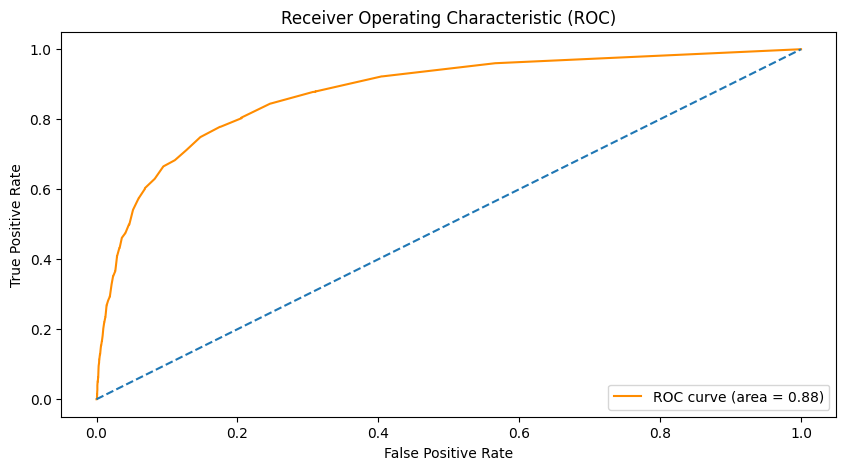

In [27]:
y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
